In [1]:
from fastai.vision import *
import pandas as pd
import os

In [2]:
!ls

copy_engine_from_ESC-50.ipynb  edit_soundfiles.ipynb   README.md
create_dataset.ipynb	       learner_v1.ipynb        sac_test
create_spectogram.ipynb        learner_v2.ipynb        temp
datasets		       merge_dataframes.ipynb


In [49]:
path = Path('./datasets/dataset1_3sec/')

In [50]:
data = ImageDataBunch.from_folder(path = path)

In [51]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['benzin', 'diesel'], 2, 9517, 2967)

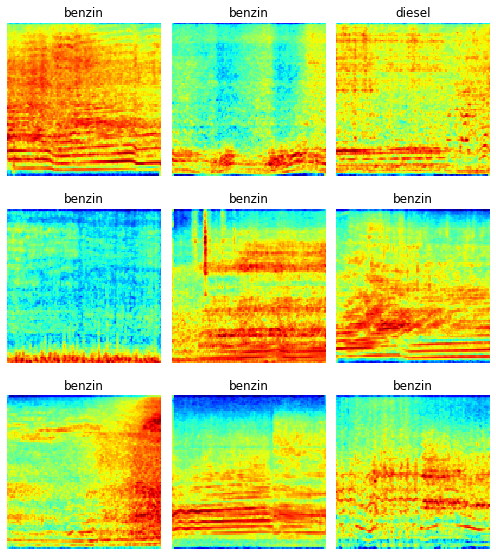

In [46]:
data.show_batch(rows = 3, figsize=(7,8))

# Train model

In [52]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [54]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time


Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lt/.conda/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/lt/.conda/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/lt/.conda/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/home/lt/.conda/envs/fastai/lib/python3.7/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/lt/.conda/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/lt/.conda/envs/fastai/lib/python3.7/multiprocessing/queues.py", line 242, in _feed
    send_bytes(obj)
  File "/home/lt/.conda/envs/fastai/lib/python3

KeyboardInterrupt: 

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(10, max_lr=slice(1e-4,2e-3))

In [ ]:
learn.save('stage-2')

# Interpretation

In [ ]:
learn.load('stage-2')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix(figsize=(5, 5))

# model in production

use testdataset? : https://forums.fast.ai/t/how-do-i-use-from-folder-to-accomodate-a-test-dataset/37273/7

In [ ]:
learn.export()

In [55]:
img = open_image('./datasets/'')
img

FileNotFoundError: [Errno 2] No such file or directory: './datasets/spect_test_diesel/2-106486-A-44_2.jpg'

In [ ]:
learn = load_learner(path)

In [ ]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

In [ ]:
pred_class = learn.predict(img)
pred_class